In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fit_library as ft
import os
import matplotlib.gridspec as gridspec
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def read_hdf(hdf5_name = "my_data.hdf"):
    data = pd.read_hdf(hdf5_name)
    return data

def filter_data(Q1,Q2,time_diff,x1Q1,x2Q1,x1Q2,x2Q2):
    # Filter Energy Ranges in Q1 and Q2
    indexer=np.where(
        np.logical_and(
            np.logical_and(
                np.greater_equal(Q1,x1Q1),
                np.less_equal(Q1,x2Q1)),
            np.logical_and(
                np.greater_equal(Q2,x1Q2),
                np.less_equal(Q2,x2Q2)
                          )
                      ))
    Q1_sel = Q1[indexer]
    Q2_sel = Q2[indexer]
    time_diff_sel = time_diff[indexer]
    
    return Q1_sel,Q2_sel,time_diff_sel

Q1_fit = ft.gauss_fit()
Q2_fit = ft.gauss_fit()
td_fit = ft.gauss_fit()
        

<IPython.core.display.Javascript object>


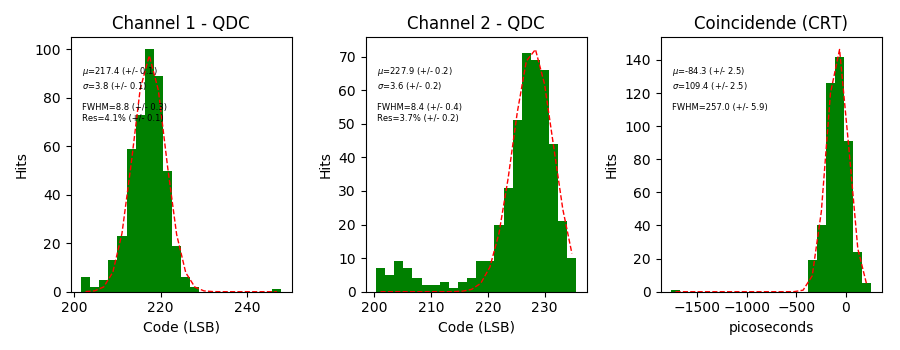

In [13]:
fig=plt.figure(figsize=(9,3.5))
fig.canvas.set_window_title("")
gs = gridspec.GridSpec( nrows=4, ncols=3,
                        width_ratios=[2, 2, 2])
ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[:, 1])
ax2 = fig.add_subplot(gs[:, 2])

In [17]:
for i in range(1,4):
    dir_name = "/home/viherbos/DAQ_DATA/MU_vs_Time/"
    hdf_filename = "c_timing_"+str(i)+".hdf"
    DATA = read_hdf(dir_name + hdf_filename)

    Q1  = np.array(DATA.loc[:,'Q1'])
    Q2  = np.array(DATA.loc[:,'Q2'])
    ts1 = np.array(DATA.loc[:,'timestamp1'])
    ts2 = np.array(DATA.loc[:,'timestamp2'])
    time_diff = ts1-ts2

    Q1_sel,Q2_sel,time_diff_sel = filter_data(Q1,Q2,time_diff,
                                              200,250,200,250)
    # Call class instance for fitting operation
    coeffQ1,perrQ1 = Q1_fit(Q1_sel,'sqrt')
    coeffQ2,perrQ2 = Q2_fit(Q2_sel,'sqrt')
    coeffTD,perrTD = td_fit(time_diff_sel,'sqrt')


    # Plot fitting results80
    ax2.cla(); ax0.cla(); ax1.cla()

    Q1_fit.plot(axis = ax0,
                title = "Channel 1 - QDC",
                xlabel = "Code (LSB)",
                ylabel = "Hits")
    Q2_fit.plot(axis = ax1,
                title = "Channel 2 - QDC",
                xlabel = "Code (LSB)",
                ylabel = "Hits")
    td_fit.plot(axis = ax2,
                title = "Coincidende (CRT)",
                xlabel = "picoseconds",
                ylabel = "Hits",res=False)
    
    plt.tight_layout()
    plt.draw()
    raw_input()

In [9]:
print coeffTD




NameError: name 'coeffTD' is not defined